In [1]:
#Import required libraries
import tweepy
import numpy as np
import pandas as pd
import networkx as nx

In [ ]:
#Twitter Developer Account: Keys and Tokens
consumer_key = 'XXXXXXXX'
consumer_secret = 'XXXXXXXX'
access_token = 'XXXXXXXX'
access_token_secret = 'XXXXXXXX'

In [ ]:
#Set up Twitter API using tweepy for crawling data on Twitter website
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True, compression=True)

In [ ]:
#Friendship network for Illinois Tech's College of Computing '@IITComputing' Twitter account
#Get the user id for user with screen name as '@IITComputing'
user = api.get_user(screen_name = '@IITComputing')  
uid = user.id
print(uid)

917528090


In [ ]:
#Crawl data for the accounts that @IITComputing follows
account = ["917528090"]
following = {}
for user in account:
    follow = []
    for page in tweepy.Cursor(api.friends_ids, user_id=user).pages():
            follow.extend(page)
    for i in follow:
      temp =api.get_user(i)
      following[i] = temp.screen_name

In [ ]:
#Collected following data
print(len(following))
print(following)

217
{217147448: 'iitcsdept', 1128095824473276418: 'KaiShu0327', 1225586995: 'IITHumanScience', 1166134633609814016: 'RealTechNewsIIT', 296451422: 'RayTrygstad', 873914781987635200: 'DrCNobles', 1466586988493127680: 'DonMeansJr', 1415350412: 'IITSHWC', 141233044: 'DLSMeteors', 997514997642289153: 'KaplanInstitute', 992976378: 'iitarc', 15421904: 'fortnow', 176579234: 'Stuart_Careers', 2463677318: 'MSFTChicago', 175145606: 'chicagoideas', 885175892: 'GalvinLibrary', 35751496: 'DePaulU', 50393960: 'BillGates', 154875374: 'chandiwalp', 240947657: 'samsleva', 12292472: 'ASacco', 111101327: 'IITStuart', 840722088: 'IITProjectLEAD', 394354493: 'GovTechChicago', 807344617: 'IITMLA', 246859688: 'OTSSupportDesk', 928844209: 'IITTennis', 19638556: 'ChicagoEvent', 306304686: 'MayorRahm', 19616718: 'USNewsEducation', 1344951: 'WIRED', 17369110: 'Cornell', 14372486: 'engadget', 5695032: 'Yale', 27134498: 'IITFaculty', 334140098: 'CenterCourtLN', 571123406: 'IITBursar', 586579122: '1_open', 792268640

In [ ]:
#Create s1 as the source for edges from '@IITComputing' to the accounts it follows
s1 = [uid]*len(following)

In [ ]:
print(len(s1))
print(s1)

217
[917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 91752

In [ ]:
#Create a dataframe using pandas library for the collected 'following' data
df = pd.DataFrame.from_dict(following, orient='index', columns = ['label'])
df.reset_index(inplace=True)
df['source'] = s1
print(df)

                   index            label     source
0              217147448        iitcsdept  917528090
1    1128095824473276418       KaiShu0327  917528090
2             1225586995  IITHumanScience  917528090
3    1166134633609814016  RealTechNewsIIT  917528090
4              296451422      RayTrygstad  917528090
..                   ...              ...        ...
212            183102912        jamiepixi  917528090
213             17093617        hootsuite  917528090
214            218288929     IITAdmission  917528090
215             87246946    IITCampusLife  917528090
216             16932547     illinoistech  917528090

[217 rows x 3 columns]


In [ ]:
df = df.rename(columns = {'index': 'target'})

In [ ]:
print(df)

                  target            label     source
0              217147448        iitcsdept  917528090
1    1128095824473276418       KaiShu0327  917528090
2             1225586995  IITHumanScience  917528090
3    1166134633609814016  RealTechNewsIIT  917528090
4              296451422      RayTrygstad  917528090
..                   ...              ...        ...
212            183102912        jamiepixi  917528090
213             17093617        hootsuite  917528090
214            218288929     IITAdmission  917528090
215             87246946    IITCampusLife  917528090
216             16932547     illinoistech  917528090

[217 rows x 3 columns]


In [ ]:
#Create csv file from dataframe
df.to_csv('Following_Data.csv')

In [ ]:
#Download csv file 
from google.colab import files
files.download('Following_Data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Crawl data for the accounts that follow @IITComputing
account = ["917528090"]
followers = {}
for user in account:
    follow = []
    for page in tweepy.Cursor(api.followers_ids, user_id=user).pages():
            follow.extend(page)
    for i in follow:
      temp =api.get_user(i)
      followers[i] = temp.screen_name

In [ ]:
#Collected followers data
print(len(followers))
print(followers)

458
{1621133261505429504: 'AnnaSrinivasan4', 1621853970284044288: 'Lorenzo87567280', 1623050008567095316: 'VatsalM05797052', 1619934482055761920: 'astjzl', 4184514795: 'Ssanidhya2', 1554927476912054272: 'TakvileT', 845303725317132288: 'ojAsare910', 1590230502216269824: '_enekogonzalez', 1529487350803447809: 'CaliforniaSIC', 1615231108769255424: 'nndu88910861', 732603380548263937: 'AshikHafi', 1492633402171875328: 'mansqtech', 168347539: 'Andresorozcoe', 1609179637535412224: 'NewILHancock', 1388012543872933888: 'DineshCherupal3', 1513689154068127752: 'alexvassar2025', 1049507639850360832: 'Jxhnzii', 908190181521473536: 'udayGattu22', 1489340408949886983: 'SciPolKate', 1405788577741541379: 'TrinhGi43058640', 102933899: 'EstiZhafira', 841818732175450112: 'csam20000', 3616418532: 's_sivanujan', 1480268410986524673: 'OriginalTRUFC', 16352546: 'shadibeidas', 1485994070526906373: 'AdianM1707', 1141894995378614272: 'ManuelTravis5', 391535670: 'laudelg27', 1069931438856855554: 'HebbarSahab', 49

In [ ]:
#Create t1 as the target for edges from the account that follows '@IITComputing' to '@IITComputing'
t1 = [uid]*len(followers)

In [ ]:
print(len(t1))
print(t1)

458
[917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 917528090, 91752

In [ ]:
#Create a dataframe using pandas library for the collected 'followers' data
df1 = pd.DataFrame.from_dict(followers, orient='index', columns = ['label'])
df1.reset_index(inplace=True)
df1['target'] = t1
print(df)

                  target            label     source
0              217147448        iitcsdept  917528090
1    1128095824473276418       KaiShu0327  917528090
2             1225586995  IITHumanScience  917528090
3    1166134633609814016  RealTechNewsIIT  917528090
4              296451422      RayTrygstad  917528090
..                   ...              ...        ...
212            183102912        jamiepixi  917528090
213             17093617        hootsuite  917528090
214            218288929     IITAdmission  917528090
215             87246946    IITCampusLife  917528090
216             16932547     illinoistech  917528090

[217 rows x 3 columns]


In [ ]:
df1 = df1.rename(columns = {'index': 'source'})

In [ ]:
print(df1)

                  source            label     target
0    1621133261505429504  AnnaSrinivasan4  917528090
1    1621853970284044288  Lorenzo87567280  917528090
2    1623050008567095316  VatsalM05797052  917528090
3    1619934482055761920           astjzl  917528090
4             4184514795       Ssanidhya2  917528090
..                   ...              ...        ...
453            726409806     IITCommunity  917528090
454             45899585  ScottPfeiffer54  917528090
455             87246946    IITCampusLife  917528090
456             16932547     illinoistech  917528090
457            218288929     IITAdmission  917528090

[458 rows x 3 columns]


In [ ]:
#Create csv file from dataframe
df1.to_csv('Followers_Data.csv')

In [ ]:
#Download csv file
from google.colab import files
files.download('Followers_Data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Following Data for '@IITComputing'
print(df)

                  target            label     source
0              217147448        iitcsdept  917528090
1    1128095824473276418       KaiShu0327  917528090
2             1225586995  IITHumanScience  917528090
3    1166134633609814016  RealTechNewsIIT  917528090
4              296451422      RayTrygstad  917528090
..                   ...              ...        ...
212            183102912        jamiepixi  917528090
213             17093617        hootsuite  917528090
214            218288929     IITAdmission  917528090
215             87246946    IITCampusLife  917528090
216             16932547     illinoistech  917528090

[217 rows x 3 columns]


In [ ]:
#Followers Data for '@IITComputing'
print(df1)

                  source            label     target
0    1621133261505429504  AnnaSrinivasan4  917528090
1    1621853970284044288  Lorenzo87567280  917528090
2    1623050008567095316  VatsalM05797052  917528090
3    1619934482055761920           astjzl  917528090
4             4184514795       Ssanidhya2  917528090
..                   ...              ...        ...
453            726409806     IITCommunity  917528090
454             45899585  ScottPfeiffer54  917528090
455             87246946    IITCampusLife  917528090
456             16932547     illinoistech  917528090
457            218288929     IITAdmission  917528090

[458 rows x 3 columns]


In [2]:
#Using networkx library to visualuze the data into graph
G = nx.Graph()

In [3]:
#Import the processed 'Edges.csv' file
data = pd.read_csv('/content/Edges.csv')

In [4]:
#Convert dataframe into graph
G = nx.from_pandas_edgelist(data, 'source', 'target')

In [5]:
!pip install 'networkx<2.7'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
#Determine layout for network
pos = nx.spring_layout(G)

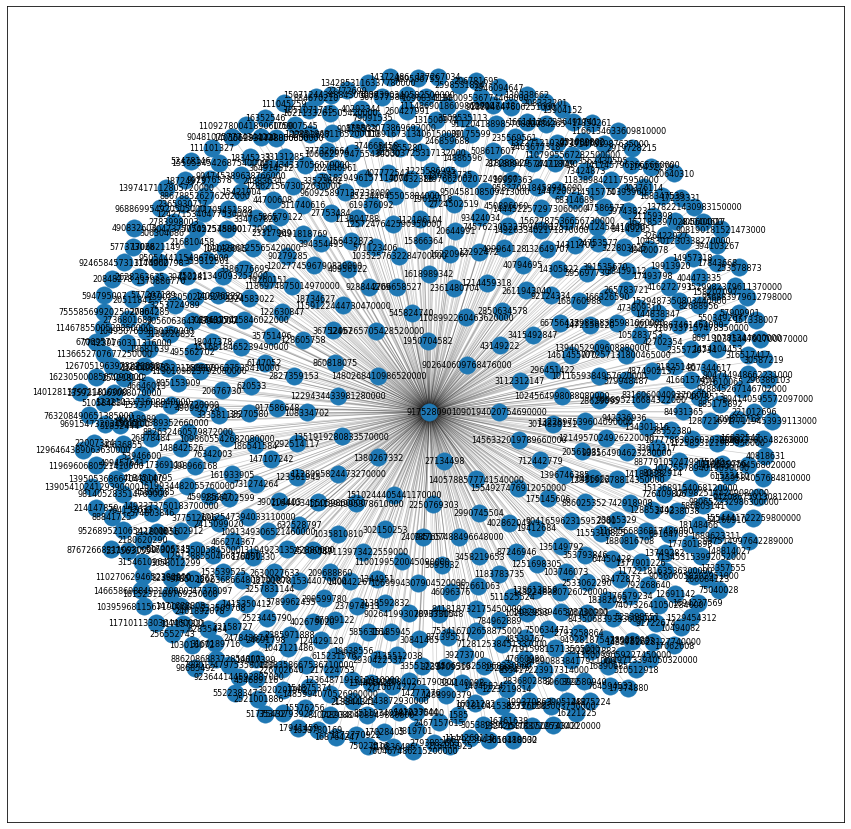

In [7]:
#Friendship network of '@IITComputing'
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(15, 15))
plt.style.use('ggplot')
nodes = nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, width=.7, alpha=0.2)
plt.show()

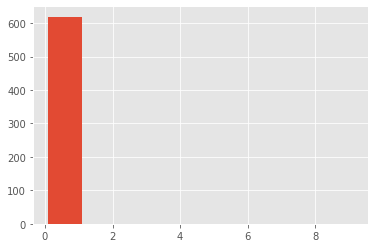

In [8]:
#Histogram plot of degree distribution
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.style.use('ggplot')
    bins = np.arange(0,10)+0.1
    plt.hist(degrees,bins=bins)
    plt.show()

plot_degree_dist(G)